# Synaptic Opto Analysis
Notebook to analyze synaptic responses to input-specific optogenetic stimulation

In [1]:
# Import modules
import os
import numpy as np
from Lab_Analyses.Behavior.process_multi_session_behavior import process_multi_session_behavior
from Lab_Analyses.Optogenetics.synaptic_opto_processing import synaptic_opto_processing
import Lab_Analyses.Optogenetics.synaptic_opto_plotting as plotting
from Lab_Analyses.Optogenetics.synaptic_opto_dataclass import Grouped_Synaptic_Opto_Data


In [2]:
# Setup mice list and parameters
## Mouse ids
id_1 = "JW327"
id_2 = "JW329"

## Number of sessions for behavior
days_1 = ["240607"]
days_2 = ["240608"]

mouse_ids = [id_1, id_2]
days = [days_1, days_2]

## Other parameters
fov_type = "apical"

base_path = r'Z:\People\Jake\Behavior'

## Process behavioral data

In [ ]:
for mouse, day in zip(mouse_ids, days):
    print(f"---------------------\nAnalyzing Mouse {mouse}")
    process_multi_session_behavior(mouse_id=mouse, base_path=base_path, days=day, save=True)
    print(f"                           ", end="\r")
    print("Done")

## Analyze optogenetic responses

In [3]:
opto_data = []
for mouse in mouse_ids:
    opto = synaptic_opto_processing(mouse_id=mouse, fov_type="apical", save=True)
    opto_data.append(opto)
    
opto_data = [j for i in opto_data for j in i]

----------------------------------------------------
Analyzing Mouse JW327
- Organizing FOV1_apical data
----------------------------------------------------
Analyzing Mouse JW329
- Organizing FOV1_apical data


## Visualize data

In [4]:
# Group data
grouped_data = Grouped_Synaptic_Opto_Data(opto_data)

In [ ]:
len(grouped_data.responsive_spines)

In [ ]:
len(opto_data[0].spine_dendrite)

In [ ]:
grouped_data.spine_positions

In [5]:
figure_path = r"C:\Users\Jake\Desktop\Figures\grouped_data\Spine_Opto\thal_test"

### Plot session activity

In [ ]:
print(opto_data[0].spine_z_dFoF.shape)
print(opto_data[1].spine_z_dFoF.shape)
grouped_data.spine_processed_dFoF.shape

In [ ]:
plotting.plot_session_activity(
    dataset=grouped_data,
    identifier={"mouse_id": "JW329", "FOV": "FOV1_apical"},
    zscore=True,
    figsize=(7,8),
    save=False,
    save_path=None
)

getting mouse data
processing
Responsive idxs: [(2, 66), (40, 104), (41, 105)]
Non-responsive idxs: [(5, 69), (16, 80), (59, 123)]
plotting


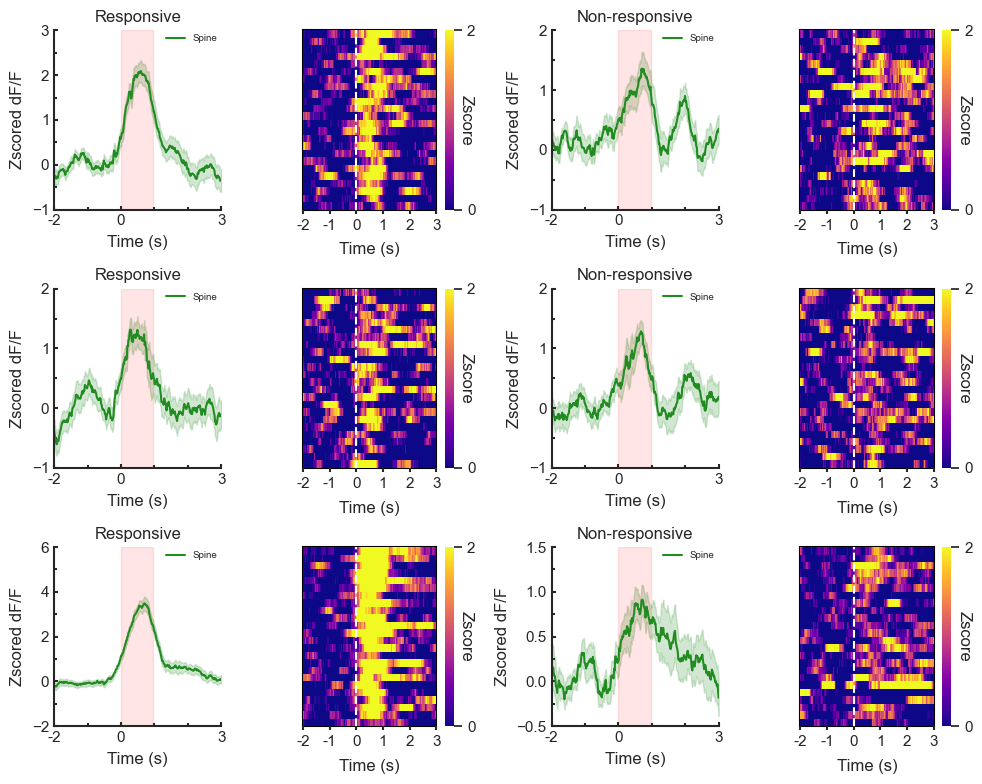

In [14]:
plotting.plot_individual_examples(
    dataset=grouped_data,
    identifiers={"mouse_id": "JW329", "FOV": "FOV1_apical"},
    hmap_range=(0, 2),
    figsize=(10,8),
    norm=False,
    save=False,
    save_path=figure_path,
)

In [ ]:
grouped_data.responsive_spines

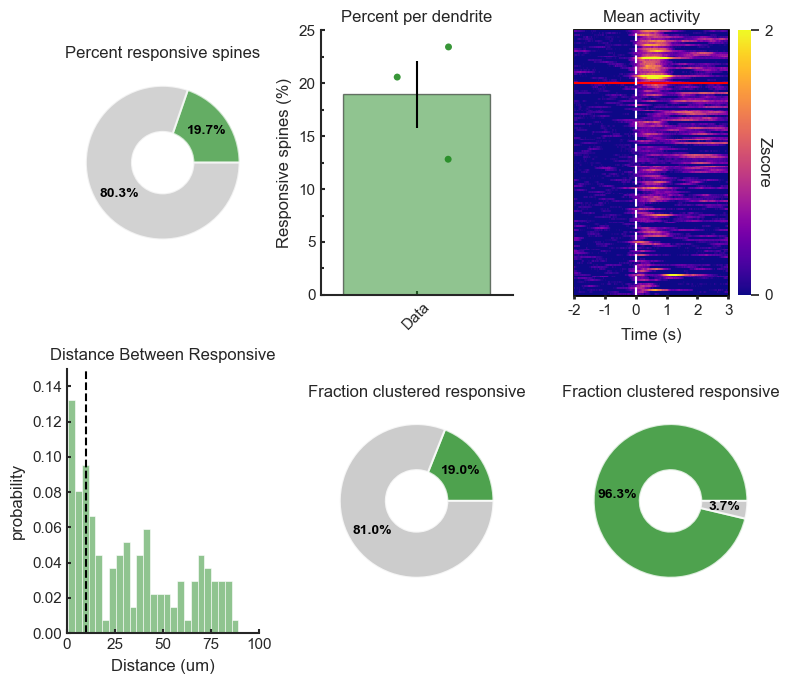

In [6]:
plotting.plot_responsive_synapse_properties(
    dataset=grouped_data,
    cluster_dist=10,
    hmap_range=(0,2),
    figsize=(8,7),
    save=False,
    save_path=figure_path
)

[  2   3   4   6   8  10  11  13  33  40  42  52  55  58  60  64  66  67
  71  73  81  84 103 104 105 106 121]
[1.02298681 1.00742481 0.53432452 0.6433306  1.28910097 2.58287044
 1.56042841 1.14220358 0.67036039 1.04093941 1.39737479 1.16523193
 0.85511956 1.27095121 0.35420642 1.63879254 0.47829802 2.05209743
 2.53279494 0.73823477 0.71426352]
1.0409394088929176
0.9306610722777959
MannwhitneyuResult(statistic=850.0, pvalue=0.6519208136624228)


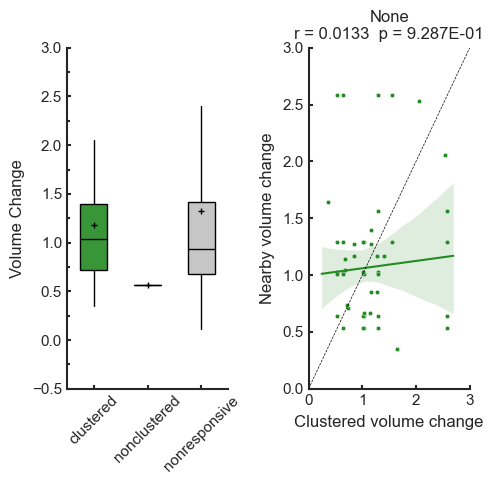

In [10]:
plotting.plot_plasticity(
    dataset=grouped_data,
    figsize=(5,5),
    cluster_dist=10,
    test_type="nonparametric",
    test_method="fdr_tsbh",
    save=False,
    save_path=None
)

In [16]:
data = np.load(r"G:\Analyzed_data\individual\JW157\population_data\JW157_Early_population_data.npy")


In [18]:
data.shape

(244, 48204)

In [ ]:
new_x

In [ ]:
X

In [ ]:
>>> from sklearn import datasets, linear_model
>>> from sklearn.model_selection import cross_validate
>>> from sklearn.metrics import make_scorer
>>> from sklearn.metrics import confusion_matrix
>>> from sklearn.svm import LinearSVC
>>> diabetes = datasets.load_diabetes()
>>> X = diabetes.data[:150]
>>> y = diabetes.target[:150]
>>> lasso = linear_model.Lasso()

In [ ]:
>>> cv_results = cross_validate(lasso, X, y, cv=3, return_train_score=True, return_estimator=True, return_indices=True)
>>> sorted(cv_results.keys())


In [ ]:
a = np.array([0,1,1,0])
b = np.array([not x for x in a]).astype(int)
b

In [ ]:
a = np.array([[1,1,1],
              [1,1,1]])
b = a * 2
np.stack([a,b]).mean(axis=0)

In [ ]:
np.concatenate(a)